# General Ideas
The task of this work is to locate the most likely locations where the excellent candidate may live close by, so that the company can send their recruiters to find her. From the description of the question, we understood that the probability that the candidate live at a certain point is given by three unrelated probability distributions. Naturally, we are thinking to form a mixture probability distribution by combine the three individual distributions together. And then the locations where corresponded to the maximum value in this mixture distribution could give us an idea of where the candidate may live.

The methods to combine the probability from different distributions could be various and depends on conditions. From the book in [1], one approach would be that the mixture distributions could be formulated by taking linear combinations of more basic distributions. Therefore, we consider the mixture probability density function $P(X)$ of form as
$$P(X) = \sum_{i=1}^{N} {\pi_{i}\cdot p_i(X)} $$
where $N$ is the number of basic probability distributions, $p_i(X)$ is <em>ith</em> basic density function and the parameter $\pi_{i}$ is the corresponding coefficients. The parameter $\pi$ could also be understood as the <em>Priori probability </em> which indicates the probability that the random variable $X$ falls into the each basic distribution. For this reason, we can obtain that 
$$\sum_{i=1}^{N} {\pi_{i} =1}, 0 \leqslant p(X) \leqslant 1 $$

Back to this questions, we have three independent probability distributions. The first distribution is a normal distribution according to the shortest distance to river spree which could be denoted by $\mathcal{N_1}(\mu,\,\sigma^2)$. The second distribution is a log-normal distribution denoted by $\ln\mathcal{N_2}(\mu,\,\sigma^2)$ according to the shortest distance to the Brandenburg Gate. And the last one is also a normal distribution $\mathcal{N_3}(\mu,\,\sigma^2)$ according to the shortest distance to a satellite path. Since there is not enough information to calculate the parameter $\pi$ for each individual distribution, we made an assumption that the three distributions are equally important. So we get 
$$\pi_1 = \pi_2 = \pi_3 \quad and \quad \pi_1 + \pi_2 + \pi_3 = 1 \\ $$
In this case, we get the value of the coefficients $\pi_1 = \pi_2 = \pi_3 = \frac{1}{3}$. Finally, we could form the mixture probability density function for any given location (x,y) as following:
$$
P(x, y) = \pi_1\cdot f_1(d_1(x,y)))+\pi_2\cdot f_2(d_2(x,y)))+\pi_3\cdot f_3(d_3(x,y))) \\
=\frac{1}{3}\mathcal{N_1}(\mu,\,\sigma^2)+\frac{1}{3}\ln\mathcal{N_2}(\mu,\,\sigma^2)+\frac{1}{3}\mathcal{N_3}(\mu,\,\sigma^2)$$

The last step is to compute the maximum value of the mixture density function and find the corresponding locations. 
We could invert the value of the complex probability function from positive space into the negative space and translate this problem into an optimization problem. The gradient descent algorithm can be used to find a local minimum value.
After we plot the mixture probability density functions in 3D mode, we could easily find out that this function is not a convex function. So there would be multiple local maximum values. Directly applying the gradient descent may lead the algorithm converging into a local minimum. We can solve this problem by carefully choosing several starting points, so that all the local minimum values can be found.

# Results and Discussion
After finishing the coding, we got three minimum values and their corresponding geo locations:

[(52.491063, 13.503022), (52.524605, 13.323907), (52.509342, 13.442927)]

We have used an python wrapper <a href="https://pypi.python.org/pypi/gmplot/1.0.5">gmplot</a> for google maps to draw an esay to read map for recruiters. The map was saved in a html file called ''easy_to_read_map.html" and we grab an screenshot here.
<img src="easy_to_read_map.png" width="600">
The three dots indicate the most possible areas whre the candidates may live. From the map, it is obvious that the locations are all very close to the spree river. And google search with the GPS coordinates, we find the following three address.

52.491063, 13.503022: Hönower Weg 38, 10319 Berlin, Germany

52.524605, 13.323907: Schlesingerstraße, 10587 Berlin, Germany

52.509342, 13.442809: METRO, An der Ostbahn 5, 10245 Berlin, Germany

In the first area, there is the train station. In the second location is within the TU Berlin just besides the river. In the last location is Metro-Fußballhimmel.


# Reference
1. Christopher M. Bishop. 2006. Pattern Recognition and Machine Learning (Information Science and Statistics). Springer-Verlag New York, Inc., Secaucus, NJ, USA.

 # Implementation
 We are trying to solve this problem using Python language. This notebook depends on the following librarys:
 Numpy, Scipy, math, matplotlib, mpl_toolkits, and gmplot.
 
 Firstly, we wrote the function to convert between the GPS coordinates and XY coordinates.

In [6]:
SW_lat = 52.464011 #(Latitude)
SW_lon = 13.274099 #(Longitude)

EARTH_RADIUS = 6371000

def gps_2_xy(P_lat, P_lon):
    P_x = (P_lon - SW_lon) * math.cos(SW_lat * math.pi / 180) * 111.323
    P_y = (P_lat - SW_lat) * 111.323

    return P_x, P_y

def xy_2_gps(x, y):

    P_lon= + SW_lon - x /(111.323 * math.cos(SW_lat))
    P_lat= (y / 111.323) + SW_lat

    return round(P_lat, 6),round(P_lon, 6)

def distance_ratio(radius):

    degree = 1
    arc_length = degree * math.pi * radius / 180.0
    x, y = gps_2_xy(SW_lat+degree, SW_lon)

    return round(arc_length/y, 3)

After converting the data into XY coordinates, we now wokring on calculate the shortest distance between a point or a line segement. Credits to the work in <a href="http://www.fundza.com/vectors/point2line/index.html">tutorial</a>, we can wrote a function to calculte the shortest distance.

In [7]:
import math
  
def dot(v,w):
    x,y,z = v
    X,Y,Z = w
    return x*X + y*Y + z*Z
  
def length(v):
    x,y,z = v
    return math.sqrt(x*x + y*y + z*z)
  
def vector(b,e):
    x,y,z = b
    X,Y,Z = e
    return (X-x, Y-y, Z-z)
  
def unit(v):
    x,y,z = v
    mag = length(v)
    return (x/mag, y/mag, z/mag)
  
def distance(p0,p1):
    return length(vector(p0,p1))
  
def scale(v,sc):
    x,y,z = v
    return (x * sc, y * sc, z * sc)
  
def add(v,w):
    x,y,z = v
    X,Y,Z = w
    return (x+X, y+Y, z+Z)

def distance_to_linesegment(pnt, start, end):
    """
    Calculate the shortest distance between a point and a line segment.
    >>> distance_to_linesegment([0, 0, 0], [1, 0, 0], [1, 1, 0])
    1.0
    >>> distance_to_linesegment([0, 0, 0], [1, 0, 0],[0, 1, 0])
    0.7071067811865476
    """
    line_vec = vector(start, end)
    pnt_vec = vector(start, pnt)
    line_len = length(line_vec)
    line_unitvec = unit(line_vec)
    pnt_vec_scaled = scale(pnt_vec, 1.0/line_len)
    t = dot(line_unitvec, pnt_vec_scaled)
    if t < 0.0:
        t = 0.0
    elif t > 1.0:
        t = 1.0
    nearest = scale(line_vec, t)
    dist = distance(nearest, pnt_vec)
    return round(dist,6)

Now we can work on presenting the three distributions for a given point (x, y).
For the distribution near spree river and satellite path are normal distribution. In order to solve the normal distribution, we need to figure out the mean $\mu$ and standard deviation $\sigma$.
From the question, we know that ''The function peaks at zero and has 95% of its total integral within +/-2730m'' in spree river distribution.
In the introduction of <a href="https://en.wikipedia.org/wiki/Normal_distribution">Normal Distribution</a>, we understand that the probability that a normal deviate lies in the range $\mu - n\sigma$ and $\mu + n\sigma$ is given by
$$ P(\mu - n\sigma \leq x \leq \mu + n\sigma) = erf\left(  \frac{n}{\sqrt{2}} \right) $$
From the table in the page, we can tell that when $n = 1.959963984540 $, the value of $P(\mu - n\sigma \leq x \leq \mu + n\sigma) = 0.95$.

From the introduction of <a = href ="https://en.wikipedia.org/wiki/Log-normal_distribution">Log-normal distribution</a> in Wikipedia, we know that the mean and mode of this distribution could be notated as:

$$ mean = e^{\mu+\sigma^2/2} , 	mode = e^{\mu-\sigma^2}$$

where $\mu$ and $\sigma$ represent the location parameter and the scale parameter, respectively. We can solve the value of $\mu$ and $\sigma$ with the following equation:
$$\mu = \frac{2*\ln{mean} + \ln{mode}}{3} , \sigma = \sqrt{\frac{2}{3}*(\ln{mean}-\ln{mode})} $$


In [21]:
import numpy as np
from scipy import stats

#The spree river could be represented with line segments 
# between the following coordinates
SPREE_GPS = [
    [52.529198,13.274099], [52.531835,13.29234], [52.522116,13.298541],
    [52.520569,13.317349], [52.524877,13.322434], [52.522788,13.329],
    [52.517056,13.332075], [52.522514,13.340743], [52.517239,13.356665],
    [52.523063,13.372158], [52.519198,13.379453], [52.522462,13.392328],
    [52.520921,13.399703], [52.515333,13.406054], [52.514863,13.416354],
    [52.506034,13.435923], [52.496473,13.461587], [52.487641,13.483216],
    [52.488739,13.491456], [52.464011,13.503386]]

GATE_GPS = [52.516288, 13.377689]

SATELLITE_START_GPS = [52.590117, 13.39915]
SATELLITE_END_GPS = [52.437385, 13.553989]

def convert_spree(spree_coords):

    XY_coords = []
    for GPS_coord in spree_coords:
        P_x, P_y = gps_2_xy(GPS_coord[0], GPS_coord[1])
        XY_coords.append([P_x, P_y])

    return XY_coords
def spree_distribution(x,y):
    mu = 0.0
    sigma = (2730/distance_ratio(EARTH_RADIUS)) / 1.959963

    spree_coords = []
    for GPS_coord in SPREE_GPS:
        P_x, P_y = gps_2_xy(GPS_coord[0], GPS_coord[1])
        spree_coords.append([P_x, P_y, 0])
    distances = []

    for idx in range(len(spree_coords)-1):
        start_point = spree_coords[idx]
        end_point = spree_coords[idx+1]
        distances.append(distance_to_linesegment([x,y,0], start_point, end_point))
    shortest_distance = min(distances)
    return stats.norm.pdf(shortest_distance, loc = mu, scale = sigma)


def gate_distribution(x, y):
    mean = 4700 / distance_ratio(EARTH_RADIUS)
    mode = 3877 /distance_ratio(EARTH_RADIUS)

    GATE_coord = gps_2_xy(GATE_GPS[0], GATE_GPS[1])
    shortest_distance = length(vector([GATE_coord[0], GATE_coord[1],0], [x, y, 0]))

    mu = (2.0 * math.log(mean) + math.log(mode))/3
    sigma = math.sqrt((math.log(mean)-math.log(mode)) * 2.0 /3)

    return stats.lognorm.pdf(shortest_distance, s=sigma, loc=0, scale=math.exp(mu))


def satellite_distribution(x, y):
    mu= 0.0
    sigma= (2400 / distance_ratio(EARTH_RADIUS)) / 1.959963

    start_coord = gps_2_xy(SATELLITE_START_GPS[0], SATELLITE_START_GPS[1])
    end_coord = gps_2_xy(SATELLITE_END_GPS[0], SATELLITE_END_GPS[1])

    shortest_distance = distance_to_linesegment([x,y,0], 
                                                [start_coord[0], start_coord[1], 0], 
                                                [end_coord[0], end_coord[1], 0])
    return stats.norm.pdf(shortest_distance, loc = mu, scale = sigma)

We wrote an function to visualize the probability density function in XY coordinates. In the figures, the dash dot line is the spree river. The green diamond represents the Brandenburg Gate. And the dashed yellow line is the satellite path.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def pds_in_grid(pdf):
    x = np.linspace(0.0, 20.0, num=100)
    y = np.linspace(0.0, 12.0, num=75)
    X, Y = np.meshgrid(x, y)
    XY = np.array([X.ravel(), Y.ravel()]).T

    pds = np.zeros(7500)

    idx=0
    for point in XY:
        pds[idx] = pdf(point[0], point[1])
        idx = idx+1

    pds = pds.reshape((75, 100))
    return X,Y,pds
    return X,Y,pds

def draw_2D_plot(pdf, peak_points = []):

    X,Y,pds = pds_in_grid(pdf)

    CS = plt.contour(X, Y, pds)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    spree_coords = convert_spree(SPREE_GPS)
    spree_coords = np.asarray(spree_coords)
    plt.plot(spree_coords[:, 0], spree_coords[:, 1], '-.')

    GATE_coord = gps_2_xy(GATE_GPS[0], GATE_GPS[1])
    plt.plot(GATE_coord[0], GATE_coord[1], 'gD')

    start_coord = gps_2_xy(SATELLITE_START_GPS[0], SATELLITE_START_GPS[1])
    end_coord = gps_2_xy(SATELLITE_END_GPS[0], SATELLITE_END_GPS[1])
    satellite_path = np.asarray([start_coord, end_coord])
    plt.plot(satellite_path[:, 0], satellite_path[:, 1],color='y', ls='--', lw=1)

    for peak_point in peak_points:
        plt.plot(peak_point[0], peak_point[1], 'ro')

    plt.axis([-1, 20, -1, 20])

    plt.title('PDF')
    plt.axis('tight')
    plt.show()
    
draw_2D_plot(spree_distribution)
draw_2D_plot(gate_distribution)
draw_2D_plot(satellite_distribution)

Once we get the three individual distributions, we could work on the mixture distributions with linear combinations

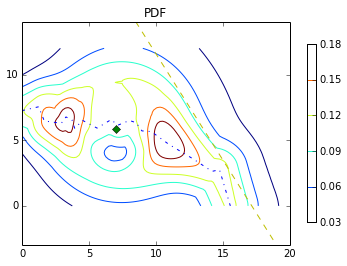

In [10]:
def mixture_distribution(x, y):
    return 1.0/3 * spree_distribution(x, y) + 1.0/3 * gate_distribution(x, y) + 1.0/3 * satellite_distribution(x, y)
draw_2D_plot(mixture_distribution)

In order to further visualize the mixture density function, we plot it in 3D space. 

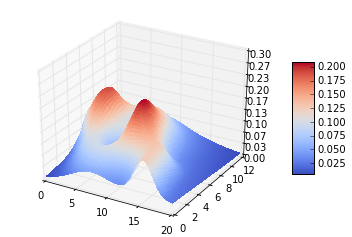

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
def draw_3D_plot(pdf):
    
    X,Y,pds = pds_in_grid(pdf)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, pds, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    ax.set_zlim(0, 0.30)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
draw_3D_plot(mixture_distribution)

From the previous map, we could see three peak points. So, next we will use the gradient desent algorithm to find these location.

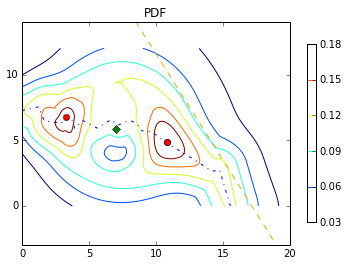

The three GPS coordinates: 
[(52.507647, 13.439489), (52.525137, 13.324542), (52.507648, 13.439491)]


In [12]:
from scipy import optimize

def objective_function(x):
     return -mixture_distribution(x[0],x[1])
    
def find_maxima():
    peak_point1 = optimize.minimize(objective_function, [15.02, 2.86], method='Nelder-Mead').x
    peak_point2 = optimize.minimize(objective_function, [3.12, 6.52], method='Nelder-Mead').x
    peak_point3 = optimize.minimize(objective_function, [11.50, 5.4], method='Nelder-Mead').x

    peak_points = [peak_point1, peak_point2, peak_point3]
    
    peak_coords = [xy_2_gps(peak_point1[0],peak_point1[1]), 
                   xy_2_gps(peak_point2[0], peak_point2[1]), 
                   xy_2_gps(peak_point3[0], peak_point3[1])]

    return peak_points, peak_coords

peak_points, peak_coords = find_maxima()
draw_2D_plot(mixture_distribution, peak_points)
print "The three GPS coordinates: "
print peak_coords

GPS visualization on google map, we find this library <a href="https://github.com/vgm64/gmplot">gmplot</a> which could plot data on Google Maps. So we wrote this function to draw an easy to read map for recuriters.

In [14]:
import gmplot

BERLIN_GPS =[ 52.5167, 13.3833]

def draw_on_google_map(map_center, peak_coords):

    gmap = gmplot.GoogleMapPlotter(map_center[0], map_center[1], 13)

    peak_coords = np.asarray(peak_coords);
    gmap.heatmap(peak_coords[:,0], peak_coords[:,1], radius=100, opacity=0.5, 
                 gradient=[(50,50,50,0), (255,0,0,1), (255, 0, 0, 1)])

    gmap.draw("easy_to_read_map.html")

peak_points, peak_coords = find_maxima()
draw_on_google_map(BERLIN_GPS, peak_coords)